## Problem Statement

The main goal of this project is to build a machine learning model that, given a Covid-19 patient's current symptom, status, and medical history, will predict whether the patient is in high risk or not.

In the Boolean features, 1 means "yes" and 2 means "no". values as 97, 98 and 99 are missing data.

<li> Sex: 1 for female and 2 for male. </li></li> 
<li>  Age: of the patient. </li> 
<li>  classification: covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive. </li> 
<li>  patient type: type of care the patient received in the unit. 1 for returned home and 2 for hospitalization. </li> 
<li>  Pneumonia: whether the patient already have air sacs inflammation or not. </li> 
<li>  pregnancy: whether the patient is Pregnant or not. </li> 
<li>  Diabetes: whether the patient has Diabetes or not. </li> 
<li>  Copd: Indicates whether the patient has Chronic obstructive pulmonary disease or not. </li> 
<li>  Asthma: whether the patient has Asthma or not. </li> 
<li>  Inmsupr: whether the patient is immunosuppressed or not. </li> 
<li>  Hypertension: whether the patient has Hypertension or not. </li> 
<li>  Cardiovascular: whether the patient has heart or blood vessels related disease. </li> 
<li>  renal chronic: whether the patient has chronic renal disease or not. </li> 
<li>  other disease: whether the patient has other disease or not. </li> 
<li>  Obesity: whether the patient is obese or not. </li> 
<li>  Tobacco: whether the patient is a Tobacco user. </li> 
<li>  usmr: Indicates whether the patient treated medical units of the first, second or third level. </li> 
<li>  medical unit: type of institution of the National Health System that provided the care. </li> 
<li>  Intubed: whether the patient was connected to the ventilator. </li> 
<li>  Icu: Indicates whether the patient had been admitted to an Intensive Care Unit. </li> 
<li>  date died: If the patient died indicate the date of death, and 9999-99-99 otherwise. </li> 

## Libraries Used

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from pandarallel import pandarallel

warnings.filterwarnings('ignore')

pd.options.display.max_columns = None

## Data Description

In [2]:
data = pd.read_csv('Data/Covid Data.csv')
data.rename(columns = {'HIPERTENSION':'Hypertension'}, inplace = True)
for i in data.columns:
    data.rename(columns={i: i.title()}, inplace=True)
data.head()

,Usmer,Medical_Unit,Sex,Patient_Type,Date_Died,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [3]:
data.columns

Index(['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 'Date_Died', 'Intubed',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr',
       'Hypertension', 'Other_Disease', 'Cardiovascular', 'Obesity',
       'Renal_Chronic', 'Tobacco', 'Clasiffication_Final', 'Icu'],
      dtype='object')

In [4]:
data.shape

(1048575, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   Usmer                 1048575 non-null  int64 
 1   Medical_Unit          1048575 non-null  int64 
 2   Sex                   1048575 non-null  int64 
 3   Patient_Type          1048575 non-null  int64 
 4   Date_Died             1048575 non-null  object
 5   Intubed               1048575 non-null  int64 
 6   Pneumonia             1048575 non-null  int64 
 7   Age                   1048575 non-null  int64 
 8   Pregnant              1048575 non-null  int64 
 9   Diabetes              1048575 non-null  int64 
 10  Copd                  1048575 non-null  int64 
 11  Asthma                1048575 non-null  int64 
 12  Inmsupr               1048575 non-null  int64 
 13  Hypertension          1048575 non-null  int64 
 14  Other_Disease         1048575 non-null  int64 
 15

## Data Tweaking

### Typecasting

In [6]:
data.columns

Index(['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 'Date_Died', 'Intubed',
       'Pneumonia', 'Age', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr',
       'Hypertension', 'Other_Disease', 'Cardiovascular', 'Obesity',
       'Renal_Chronic', 'Tobacco', 'Clasiffication_Final', 'Icu'],
      dtype='object')

In [7]:
data.replace({
    'Date_Died': {
    '9999-99-99': np.nan
    }}, inplace=True)

In [8]:
data[['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 'Intubed', 'Pneumonia', 
    'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 
    'Clasiffication_Final', 'Icu']] = data[['Usmer', 'Medical_Unit', 'Sex', 'Patient_Type', 
    'Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 
    'Hypertension', 'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic',
      'Tobacco', 'Clasiffication_Final', 'Icu']].astype('category')

data['Date_Died'] = pd.to_datetime(data['Date_Died'], dayfirst=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype         
---  ------                --------------    -----         
 0   Usmer                 1048575 non-null  category      
 1   Medical_Unit          1048575 non-null  category      
 2   Sex                   1048575 non-null  category      
 3   Patient_Type          1048575 non-null  category      
 4   Date_Died             76942 non-null    datetime64[ns]
 5   Intubed               1048575 non-null  category      
 6   Pneumonia             1048575 non-null  category      
 7   Age                   1048575 non-null  int64         
 8   Pregnant              1048575 non-null  category      
 9   Diabetes              1048575 non-null  category      
 10  Copd                  1048575 non-null  category      
 11  Asthma                1048575 non-null  category      
 12  Inmsupr               1048575 non-null  ca

In [9]:
data[['Medical_Unit', 'Sex', 'Patient_Type', 'Intubed', 'Pneumonia', 
    'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 
    'Clasiffication_Final', 'Icu']].replace(to_replace=[97, 98, 99], value = np.nan, inplace = True)

data.head()

,Usmer,Medical_Unit,Sex,Patient_Type,Date_Died,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu
0,2,1,1,1,2020-05-03,NaN,1,65,2,2,2,2,2,1,2,2,2,2,2,3,NaN
1,2,1,2,1,2020-06-03,NaN,1,72,NaN,2,2,2,2,1,2,2,1,1,2,5,NaN
2,2,1,2,2,2020-06-09,1,2,55,NaN,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,2020-06-12,NaN,2,53,2,2,2,2,2,2,2,2,2,2,2,7,NaN
4,2,1,2,1,2020-06-21,NaN,2,68,NaN,1,2,2,2,1,2,2,2,2,2,3,NaN


In [10]:
# Column: Sex

data.replace({'Sex':{2: 'Male', 1: 'Female'}}, inplace = True)
data.head()

,Usmer,Medical_Unit,Sex,Patient_Type,Date_Died,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu
0,2,1,Female,1,2020-05-03,NaN,1,65,2,2,2,2,2,1,2,2,2,2,2,3,NaN
1,2,1,Male,1,2020-06-03,NaN,1,72,NaN,2,2,2,2,1,2,2,1,1,2,5,NaN
2,2,1,Male,2,2020-06-09,1,2,55,NaN,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,Female,1,2020-06-12,NaN,2,53,2,2,2,2,2,2,2,2,2,2,2,7,NaN
4,2,1,Male,1,2020-06-21,NaN,2,68,NaN,1,2,2,2,1,2,2,2,2,2,3,NaN


In [11]:
# Column: Classification_Final

pandarallel.initialize(progress_bar = True)

def clean_classification(x):
    if (x >= 4) & (x <= 9):
        return 'Not Found'
    elif x == 1:
        return 'Low'
    elif x == 2:
        return 'Medium'
    else:
        return 'High'

data['Clasiffication_Final'] = data['Clasiffication_Final'].parallel_apply(clean_classification)

data.head()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


,Usmer,Medical_Unit,Sex,Patient_Type,Date_Died,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu
0,2,1,Female,1,2020-05-03,NaN,1,65,2,2,2,2,2,1,2,2,2,2,2,High,NaN
1,2,1,Male,1,2020-06-03,NaN,1,72,NaN,2,2,2,2,1,2,2,1,1,2,Not Found,NaN
2,2,1,Male,2,2020-06-09,1,2,55,NaN,1,2,2,2,2,2,2,2,2,2,High,2
3,2,1,Female,1,2020-06-12,NaN,2,53,2,2,2,2,2,2,2,2,2,2,2,Not Found,NaN
4,2,1,Male,1,2020-06-21,NaN,2,68,NaN,1,2,2,2,1,2,2,2,2,2,High,NaN


In [12]:
# Column: Patient Type

data.replace({
        'Patient_Type': {
        1: 'Home',
        2: 'Hospital'
        }}, inplace=True)

data.head()

,Usmer,Medical_Unit,Sex,Patient_Type,Date_Died,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu
0,2,1,Female,Home,2020-05-03,NaN,1,65,2,2,2,2,2,1,2,2,2,2,2,High,NaN
1,2,1,Male,Home,2020-06-03,NaN,1,72,NaN,2,2,2,2,1,2,2,1,1,2,Not Found,NaN
2,2,1,Male,Hospital,2020-06-09,1,2,55,NaN,1,2,2,2,2,2,2,2,2,2,High,2
3,2,1,Female,Home,2020-06-12,NaN,2,53,2,2,2,2,2,2,2,2,2,2,2,Not Found,NaN
4,2,1,Male,Home,2020-06-21,NaN,2,68,NaN,1,2,2,2,1,2,2,2,2,2,High,NaN


In [13]:
# Column: Usmer

data.replace({
    'Usmer': {
    1: 'First',
    2: 'Second',
    3: 'Third'
    }
}, inplace=True)

data.head()

,Usmer,Medical_Unit,Sex,Patient_Type,Date_Died,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu
0,Second,1,Female,Home,2020-05-03,NaN,1,65,2,2,2,2,2,1,2,2,2,2,2,High,NaN
1,Second,1,Male,Home,2020-06-03,NaN,1,72,NaN,2,2,2,2,1,2,2,1,1,2,Not Found,NaN
2,Second,1,Male,Hospital,2020-06-09,1,2,55,NaN,1,2,2,2,2,2,2,2,2,2,High,2
3,Second,1,Female,Home,2020-06-12,NaN,2,53,2,2,2,2,2,2,2,2,2,2,2,Not Found,NaN
4,Second,1,Male,Home,2020-06-21,NaN,2,68,NaN,1,2,2,2,1,2,2,2,2,2,High,NaN


In [14]:
# Converting all 1,2 into Yes, No

data[['Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 'Icu']].replace(to_replace=1, value = 'Yes', inplace = True)

data[['Intubed', 'Pneumonia', 'Pregnant', 'Diabetes', 'Copd', 'Asthma', 'Inmsupr', 'Hypertension', 
    'Other_Disease', 'Cardiovascular', 'Obesity', 'Renal_Chronic', 'Tobacco', 'Icu']].replace(to_replace=2, value = 'No', inplace = True)

In [15]:
# Column: Adding a Died Column.
# Assuming that if the date is present then the patient died, if not patient recovered or alive but still sick.
pandarallel.initialize(progress_bar=True)

def died_or_not(x):
    import pandas as pd
    if pd.isnull(x):
        return 'Alive'
    else: 
        return 'Dead' 

data['Died'] = data['Date_Died'].parallel_apply(died_or_not)
data.drop(columns='Date_Died', axis = 1, inplace=True)
data.head()

INFO: Pandarallel will run on 2 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.

https://nalepae.github.io/pandarallel/troubleshooting/


,Usmer,Medical_Unit,Sex,Patient_Type,Intubed,Pneumonia,Age,Pregnant,Diabetes,Copd,Asthma,Inmsupr,Hypertension,Other_Disease,Cardiovascular,Obesity,Renal_Chronic,Tobacco,Clasiffication_Final,Icu,Died
0,Second,1,Female,Home,NaN,Yes,65,No,No,No,No,No,Yes,No,No,No,No,No,High,NaN,Dead
1,Second,1,Male,Home,NaN,Yes,72,NaN,No,No,No,No,Yes,No,No,Yes,Yes,No,Not Found,NaN,Dead
2,Second,1,Male,Hospital,Yes,No,55,NaN,Yes,No,No,No,No,No,No,No,No,No,High,No,Dead
3,Second,1,Female,Home,NaN,No,53,No,No,No,No,No,No,No,No,No,No,No,Not Found,NaN,Dead
4,Second,1,Male,Home,NaN,No,68,NaN,Yes,No,No,No,Yes,No,No,No,No,No,High,NaN,Dead


In [16]:
target_var = 'Died'   # Classification between Died and Alive

## Univariate Analysis

In [17]:
not_to_plot = []
color = ['red', 'blue', 'green']

In [18]:
def univariate(df = data, rows = 7, cols = 3):
    k = 0
    fig=plt.figure(figsize=(20,20))
    for i in df.columns:
        if i not in not_to_plot:
            # ax=fig.add_subplot(rows,cols,k+1)
            if i in df.select_dtypes(['category', 'object']):
                ax=fig.add_subplot(rows,cols,k+1)
                sns.countplot(x= i, data = df, ax=ax)
                k += 1
            if i in df.select_dtypes(['int', 'float64']):
                ax=fig.add_subplot(rows,cols,k+1)
                sns.distplot(x = df[i], ax=ax, color=np.random.choice(color))
                ax.set(xlabel=i)
                k += 1
    fig.tight_layout() 
    plt.show()

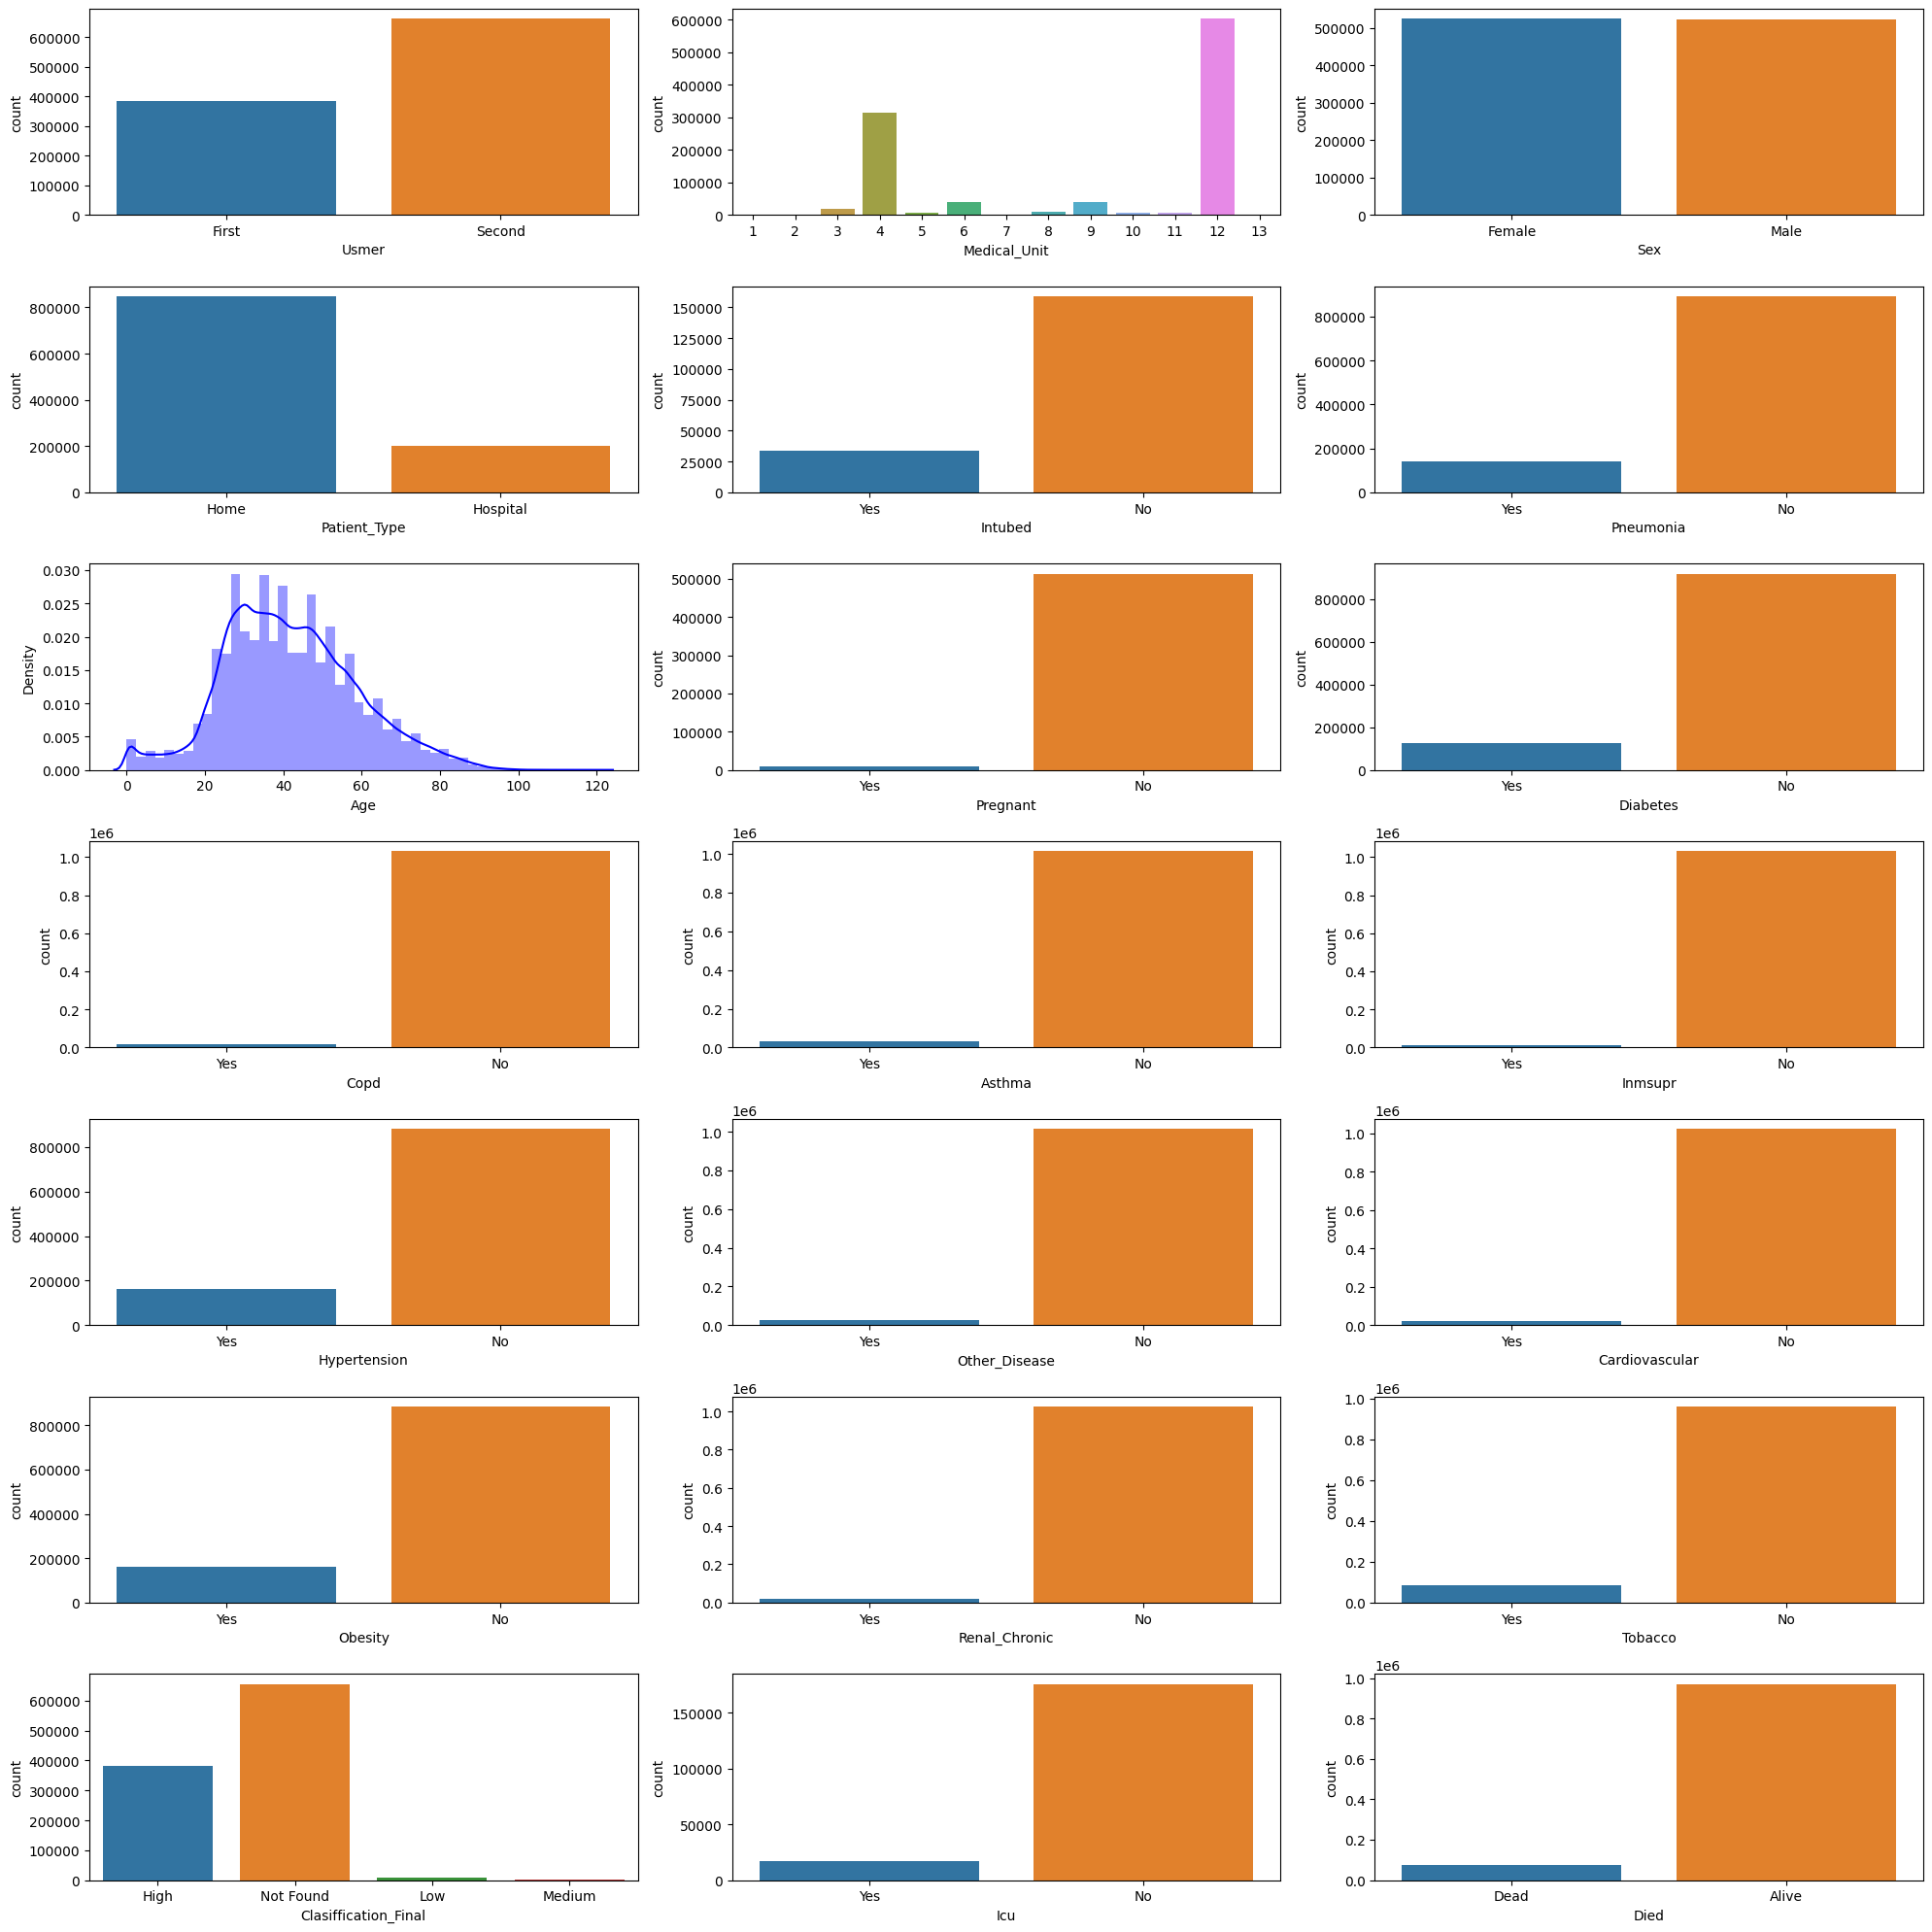

In [19]:
univariate()

### Insights:

1. 'Dead' data points are highly underbalanced as compared to 'Alive' data points. Would use SMOTE for balancing the data.
2. Maximum cases range from people aged 18-50. Could be because these people are generally out of house for different reasons like work, travel, more prone to catch Covid.
3. Pneumonia, Diabetes, Hypertension, Obesity are higher compared to other diseases. Should check Bivariate anaysis whether it has any relation to Covid severity. 

## Bivariate Analysis

In [20]:
def bivariate(df = data, y = target_var, cols = 4, rows = 5):
    temp = not_to_plot[:]
    temp.append(y)
    k = 0
    fig=plt.figure(figsize=(25,20))

    for i in df.columns:
        if i not in temp:
            if y in df.select_dtypes(['float', 'int']):
                if i in df.select_dtypes(['category', 'object']):
                    if (i not in temp): 
                        ax=fig.add_subplot(rows,cols,k+1)
                        sns.boxplot(x = i, y = y, data = df)

                if i in df.select_dtypes(['float', 'int']):                
                    if (i not in temp):      
                        ax=fig.add_subplot(rows,cols,k+1)       
                        sns.scatterplot(x = y, y = i, data = df)                  
                
            elif y in df.select_dtypes(['category', 'object']):
                if i in df.select_dtypes(['category', 'object']):
                    if (i not in temp):
                        ax=fig.add_subplot(rows,cols,k+1)
                        sns.countplot(x = i, hue = y, data = df)
                        plt.legend(bbox_to_anchor=(1, 1), loc=2, borderaxespad=0.)

                if i in df.select_dtypes(['float', 'int']):
                    if (i not in temp):
                        ax=fig.add_subplot(rows,cols,k+1)
                        sns.boxplot(x = y, y = i, data = df)
                k += 1
    fig.tight_layout() 
    plt.show()

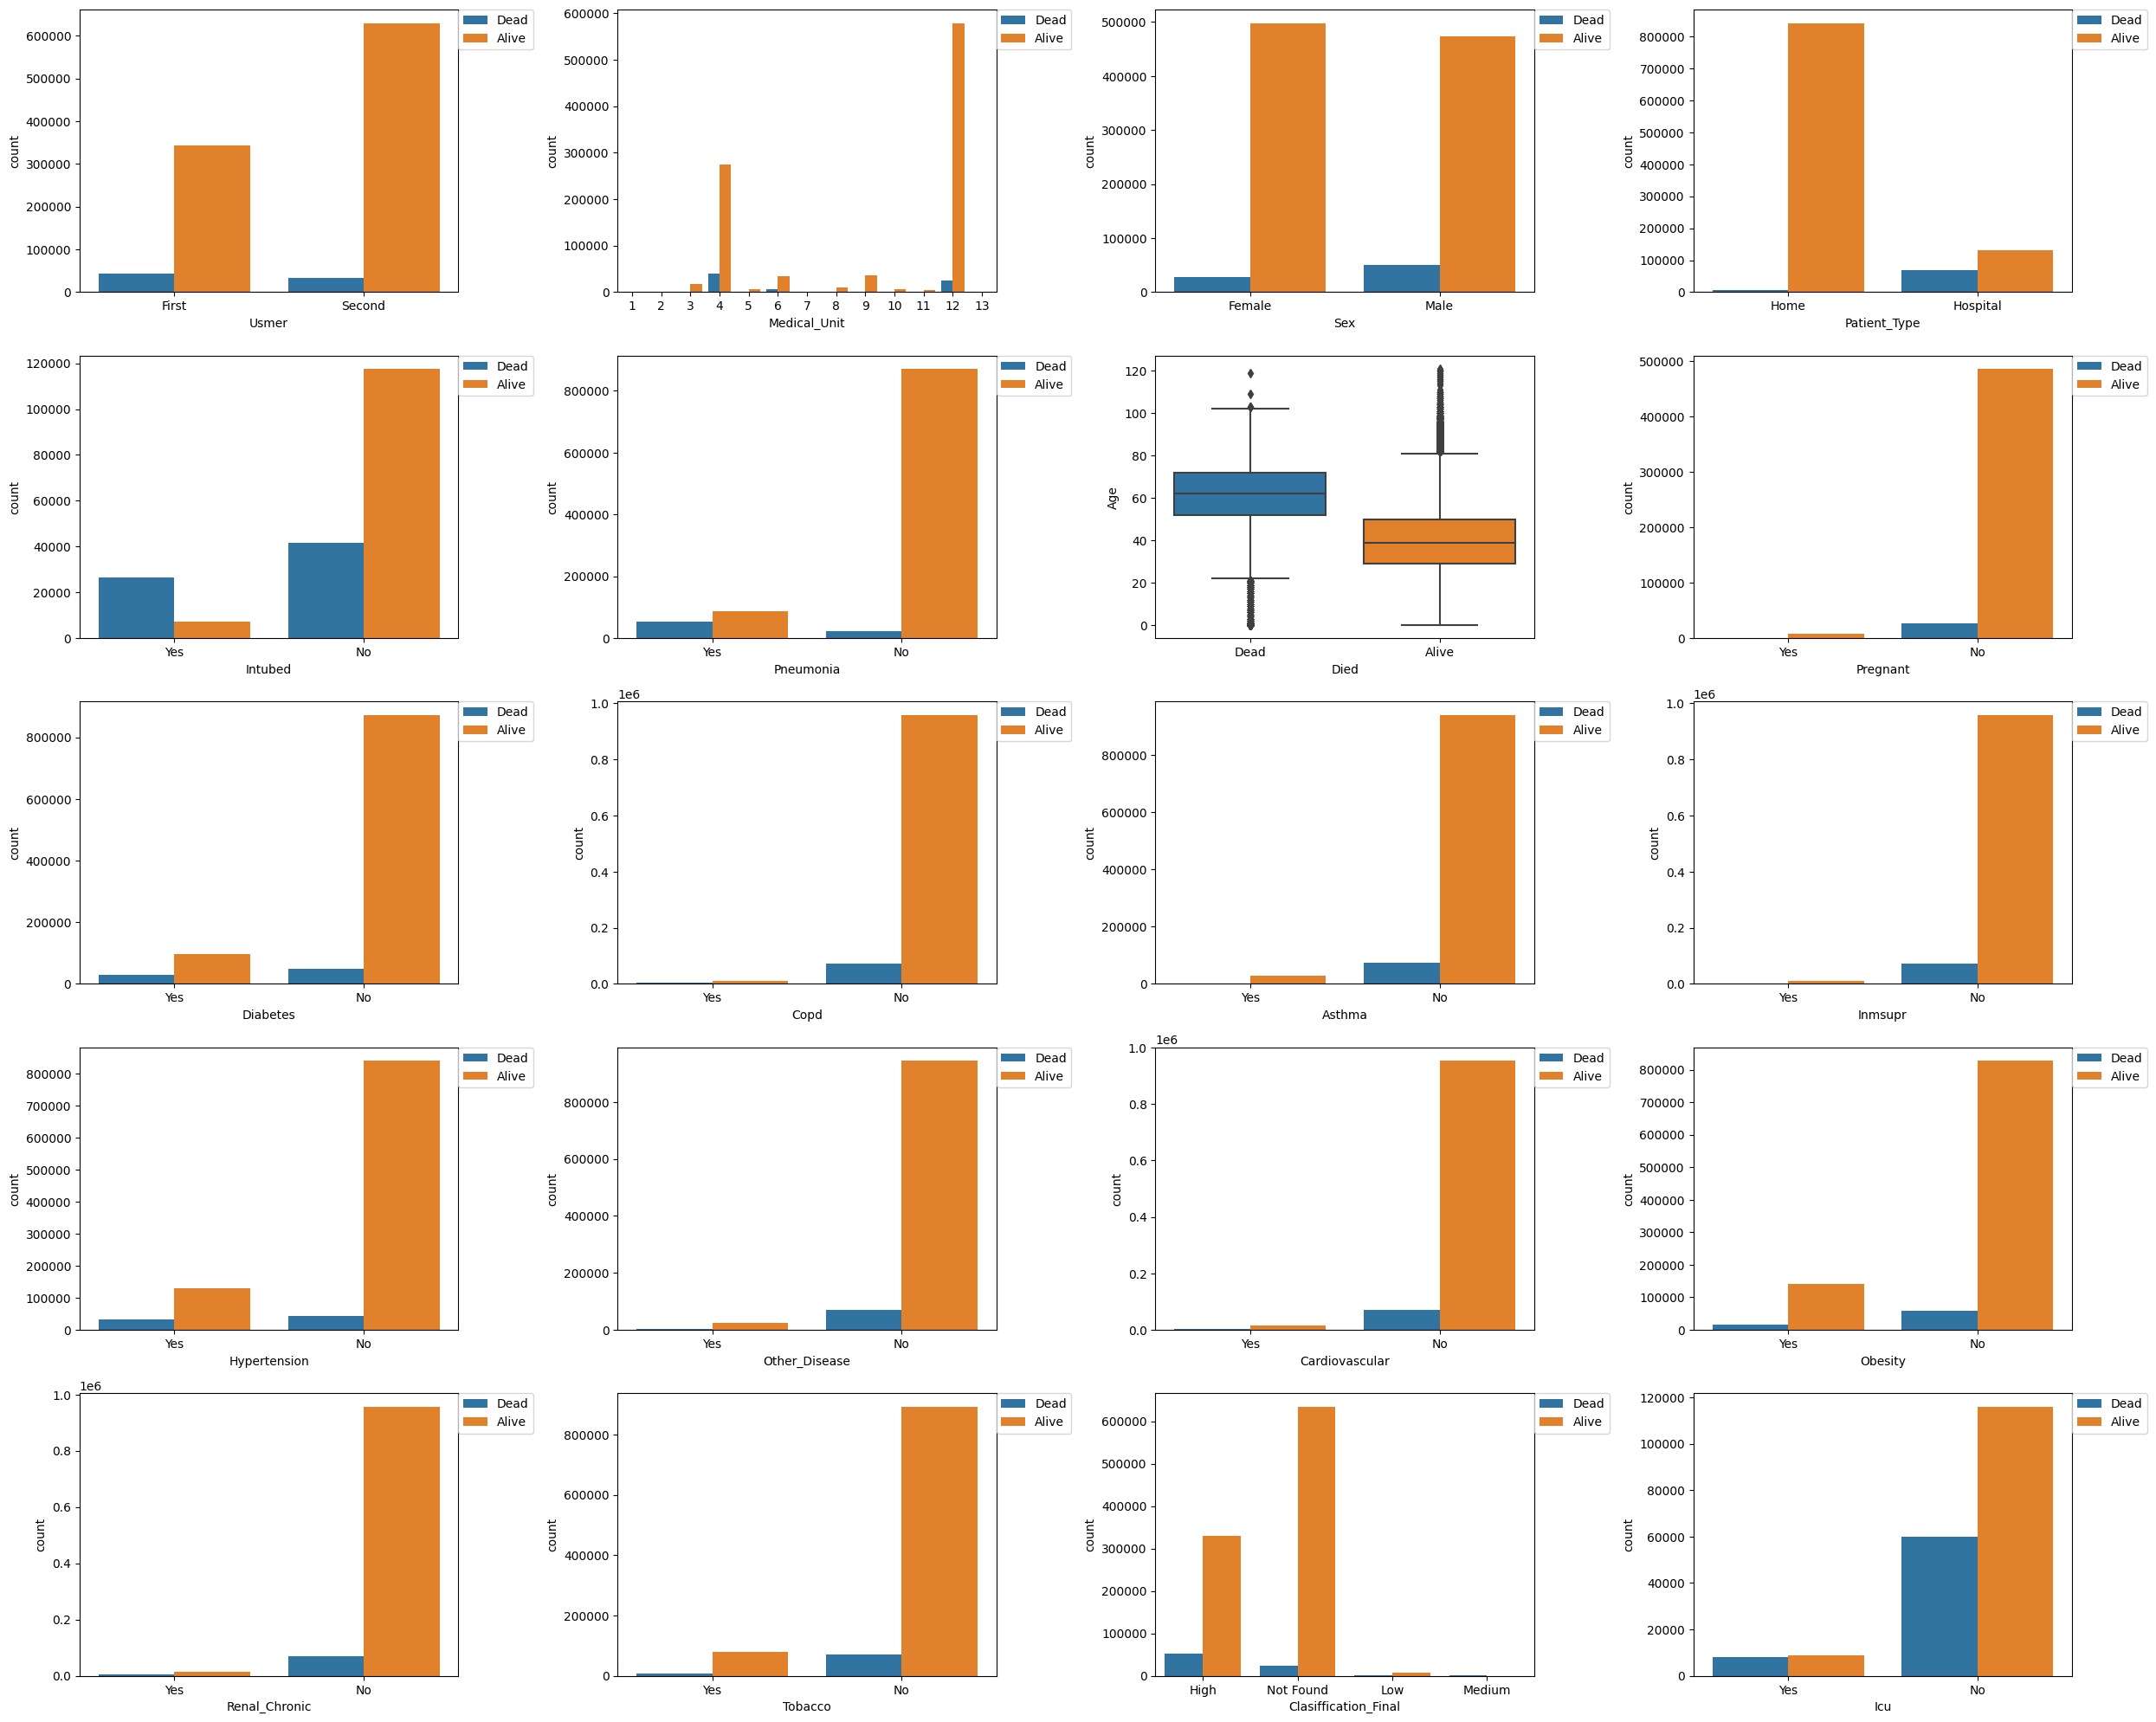

In [21]:
bivariate()

### Insights

1. We can see a direct correlation b/w 'Age' and 'Died'. Maximum people who died are centered around 60, with a few young outliers. 

## Missing Values

In [22]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Pregnant          527265
Diabetes            3338
Copd                3003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Pregnant

In [23]:
data.loc[(data['Sex'] == 'Male') & (data['Pregnant'].isnull()), 'Pregnant'] = 'No'

# Male cannot be pregnant so assigning all Males as 'No' in Pregnant

<AxesSubplot: xlabel='Pregnant', ylabel='Age'>

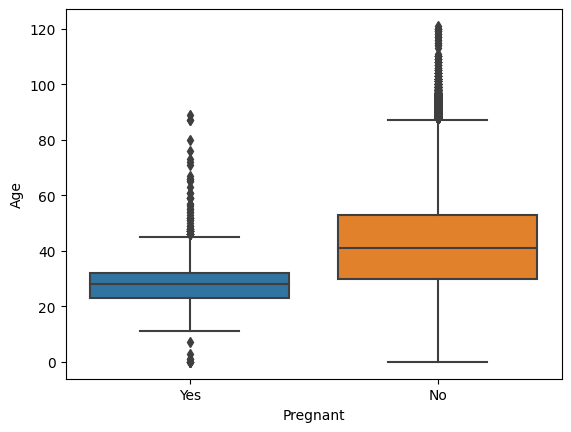

In [24]:
# Pregnant vs Age

sns.boxplot(x = 'Pregnant', y = 'Age', data = data)

In [25]:
data.loc[(data['Age'] > 18) & (data['Age'] <= 40) & (data['Pregnant'].isnull()), 'Pregnant'] = 'Yes'    # 18 - 40 may be pregnant.
data.loc[(data['Age'] <= 18) | (data['Age'] > 40) & (data['Pregnant'].isnull()), 'Pregnant'] = 'No'     # 0-18 and 40-100 are less likely to be pregnant.

In [42]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Diabetes

<AxesSubplot: xlabel='Diabetes', ylabel='Age'>

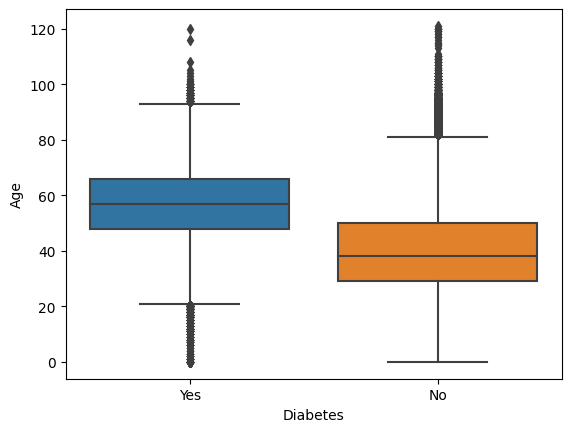

In [27]:
sns.boxplot(x = 'Diabetes', y = 'Age', data = data)

In [28]:
data.loc[(data['Age'] > 45) & (data['Diabetes'].isnull()), 'Diabetes'] = 'Yes'
data.loc[(data['Age'] <= 45) & (data['Diabetes'].isnull()), 'Diabetes'] = 'No'   

In [29]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Copd                3003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: COPD

<AxesSubplot: xlabel='Copd', ylabel='Age'>

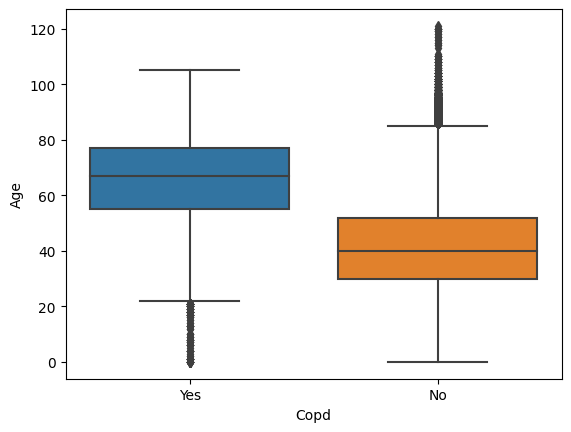

In [30]:
sns.boxplot(x = 'Copd', y = 'Age', data = data)

In [31]:
data.loc[(data['Age'] > 50) & (data['Copd'].isnull()), 'Copd'] = 'Yes'
data.loc[(data['Age'] <= 50) & (data['Copd'].isnull()), 'Copd'] = 'No'   

In [40]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Asthma              2979
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Asthma

<AxesSubplot: xlabel='Asthma', ylabel='Age'>

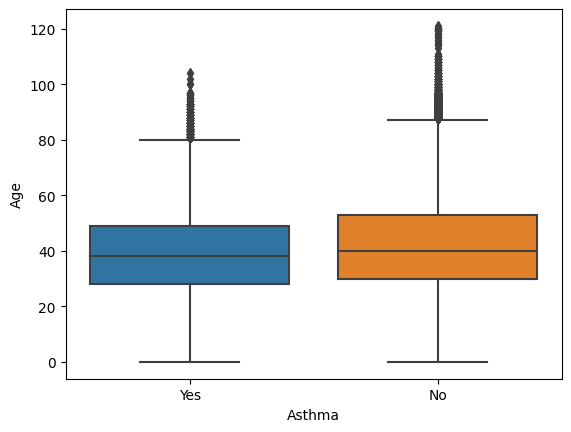

In [33]:
# Astham vs Age

sns.boxplot(x = 'Asthma', y = 'Age', data = data)  # No Relation

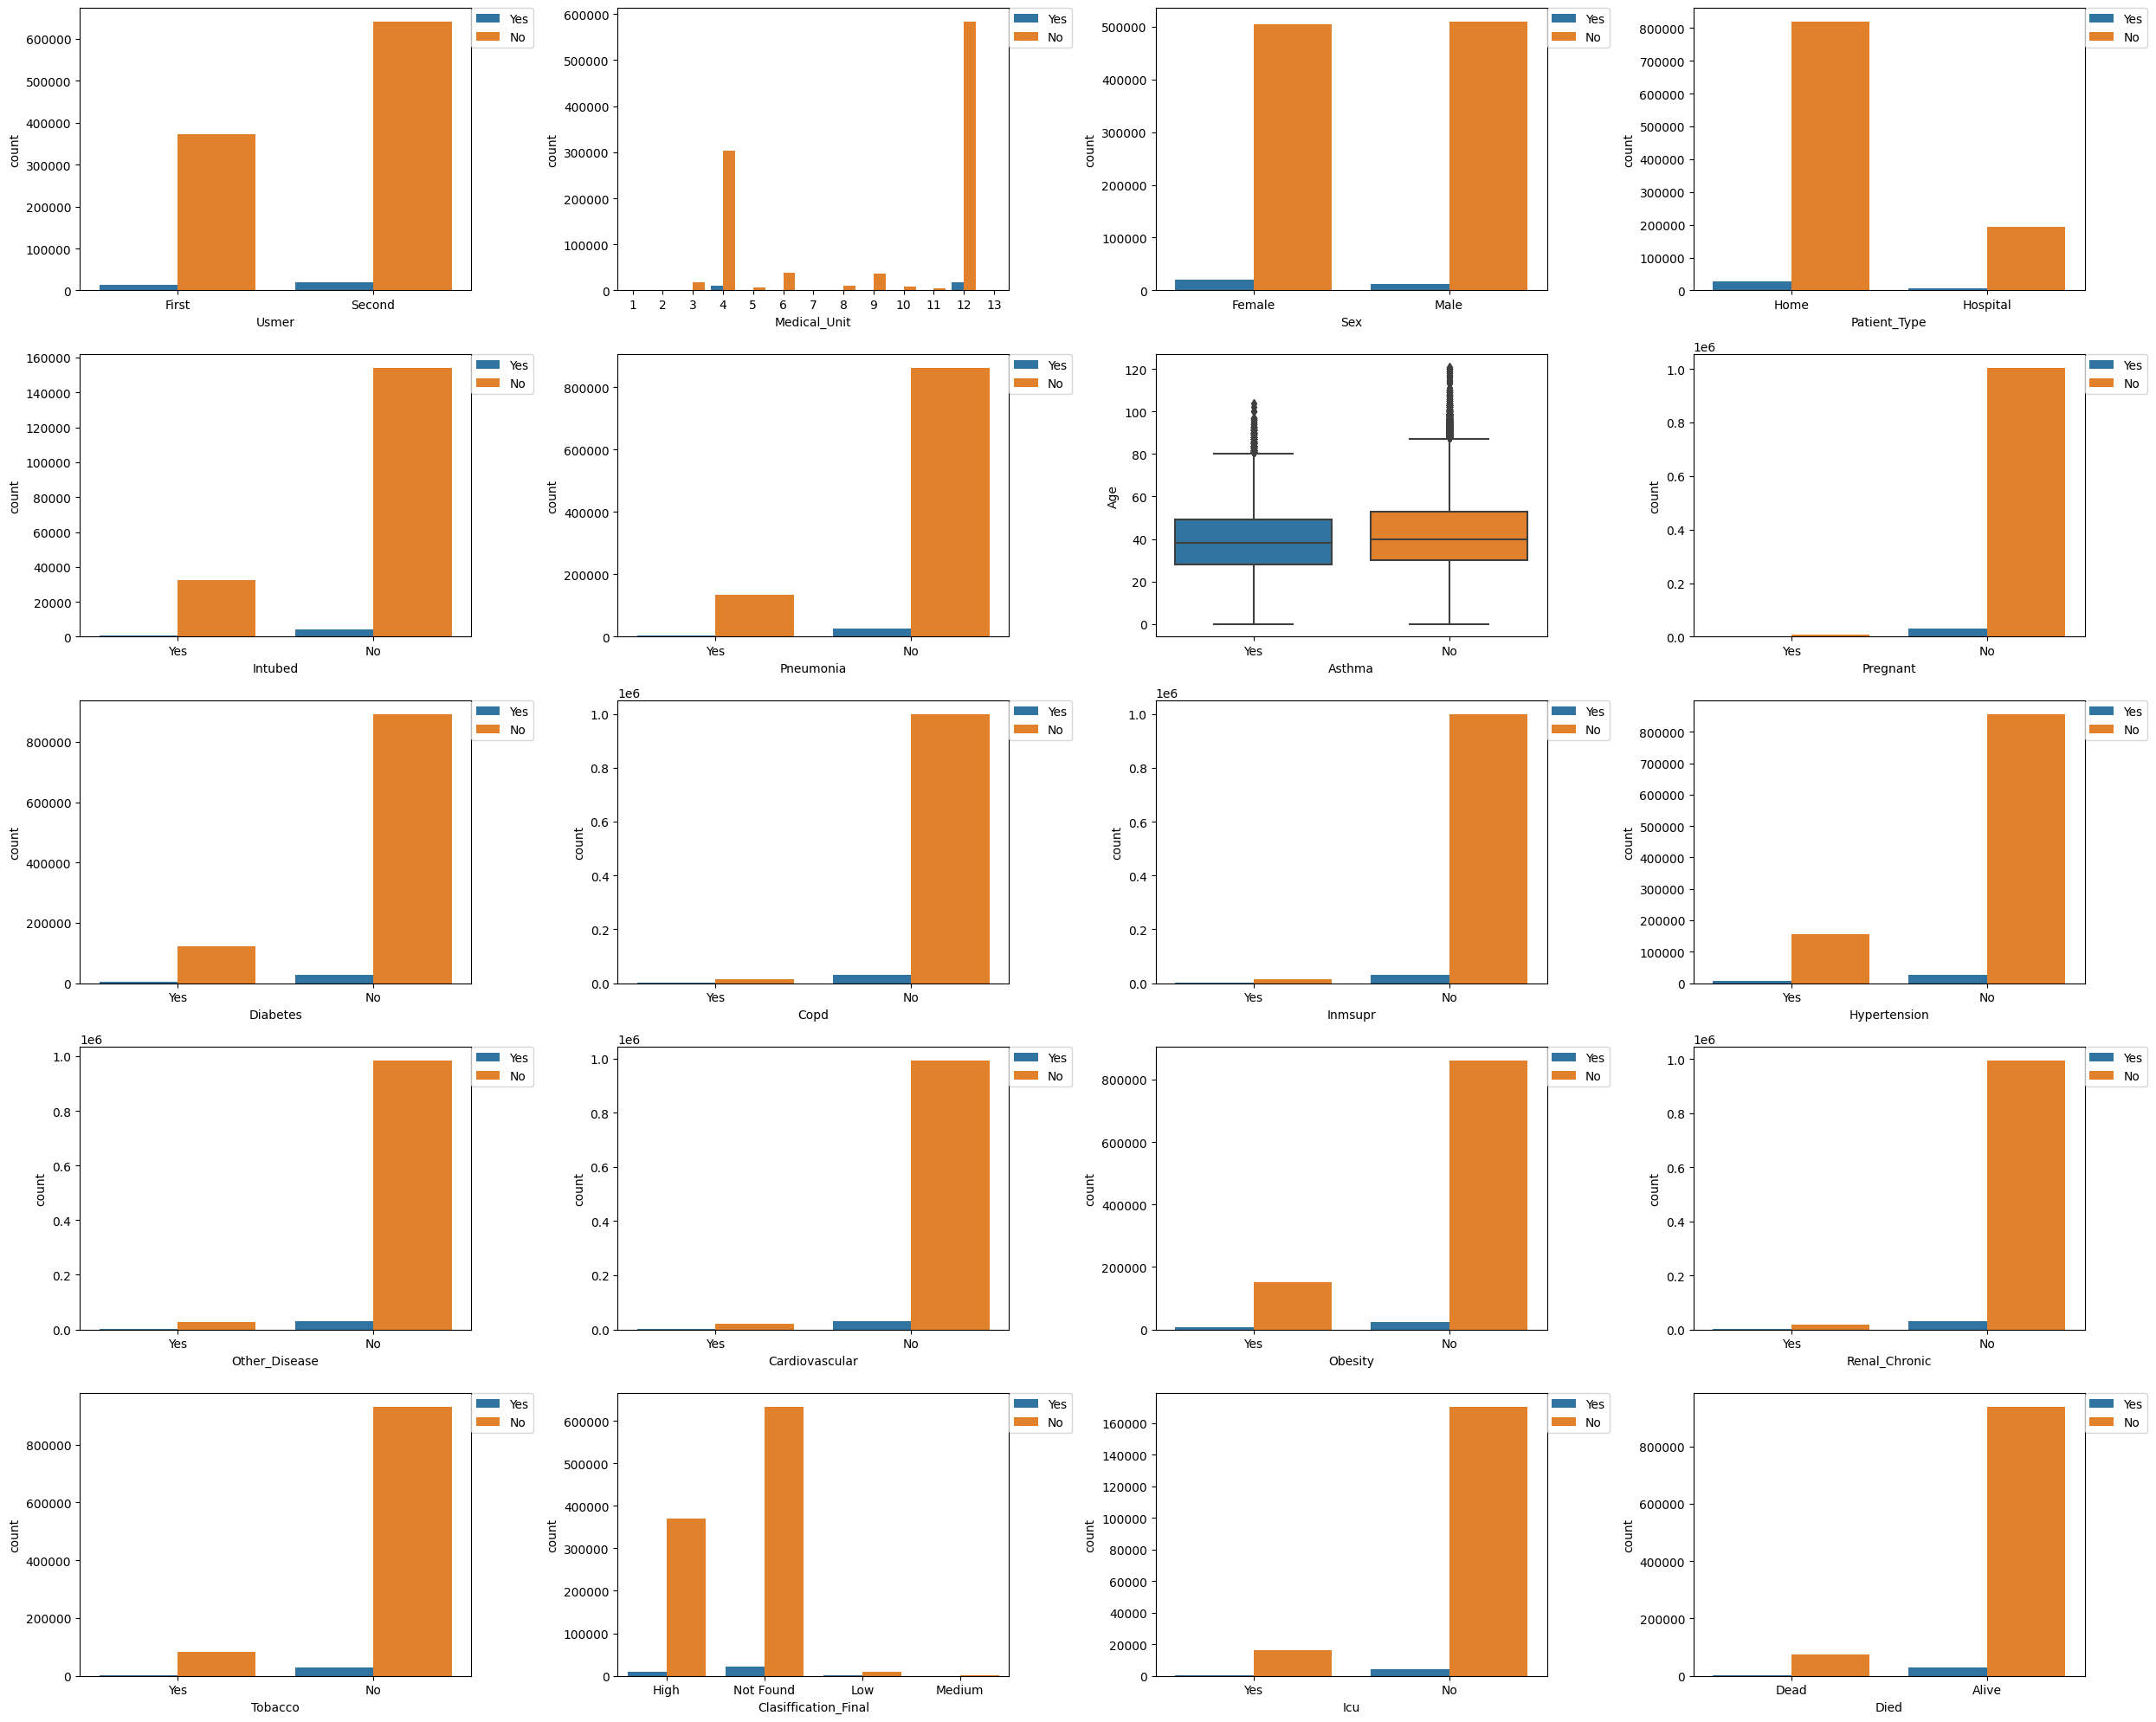

In [36]:
bivariate(y = 'Asthma')

<AxesSubplot: xlabel='Asthma', ylabel='count'>

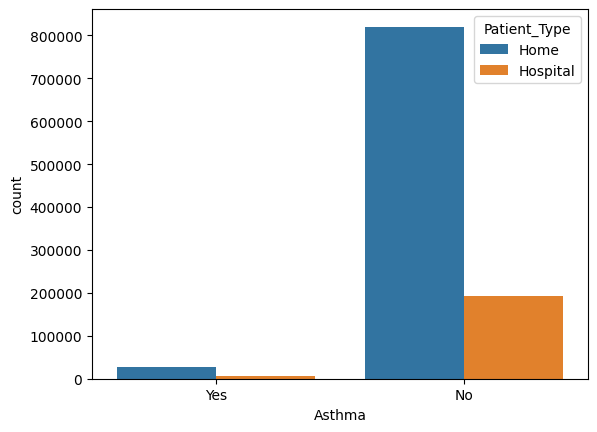

In [37]:
# Asthma vs Patient_Type

sns.countplot(x = 'Asthma', hue = 'Patient_Type', data = data)  # No Relation

<AxesSubplot: xlabel='Asthma', ylabel='count'>

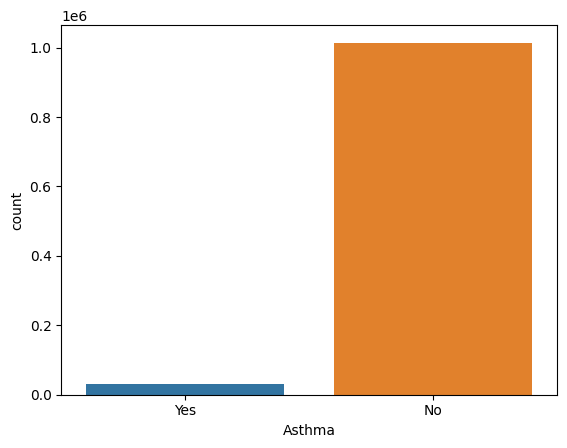

In [38]:
sns.countplot(x = 'Asthma', data = data)

In [39]:
choice = ['Yes', 'No']

In [44]:
# Adding random values since no pattern is found yet.

data.loc[data['Asthma'].isnull(), 'Asthma'] = np.random.choice(choice)   

In [45]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Inmsupr             3404
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Inmsupr

<AxesSubplot: xlabel='Inmsupr', ylabel='Age'>

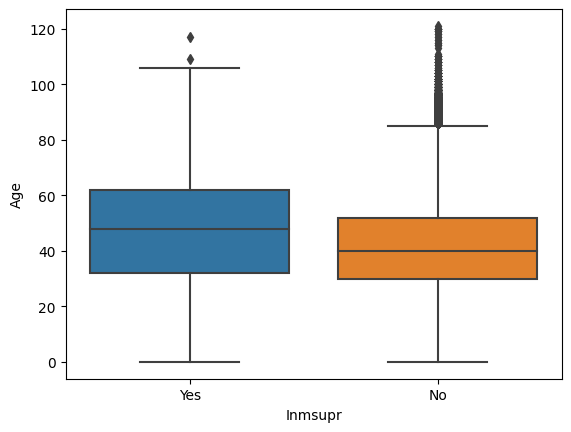

In [46]:
sns.boxplot(x = 'Inmsupr', y = 'Age', data = data)    # No Relation

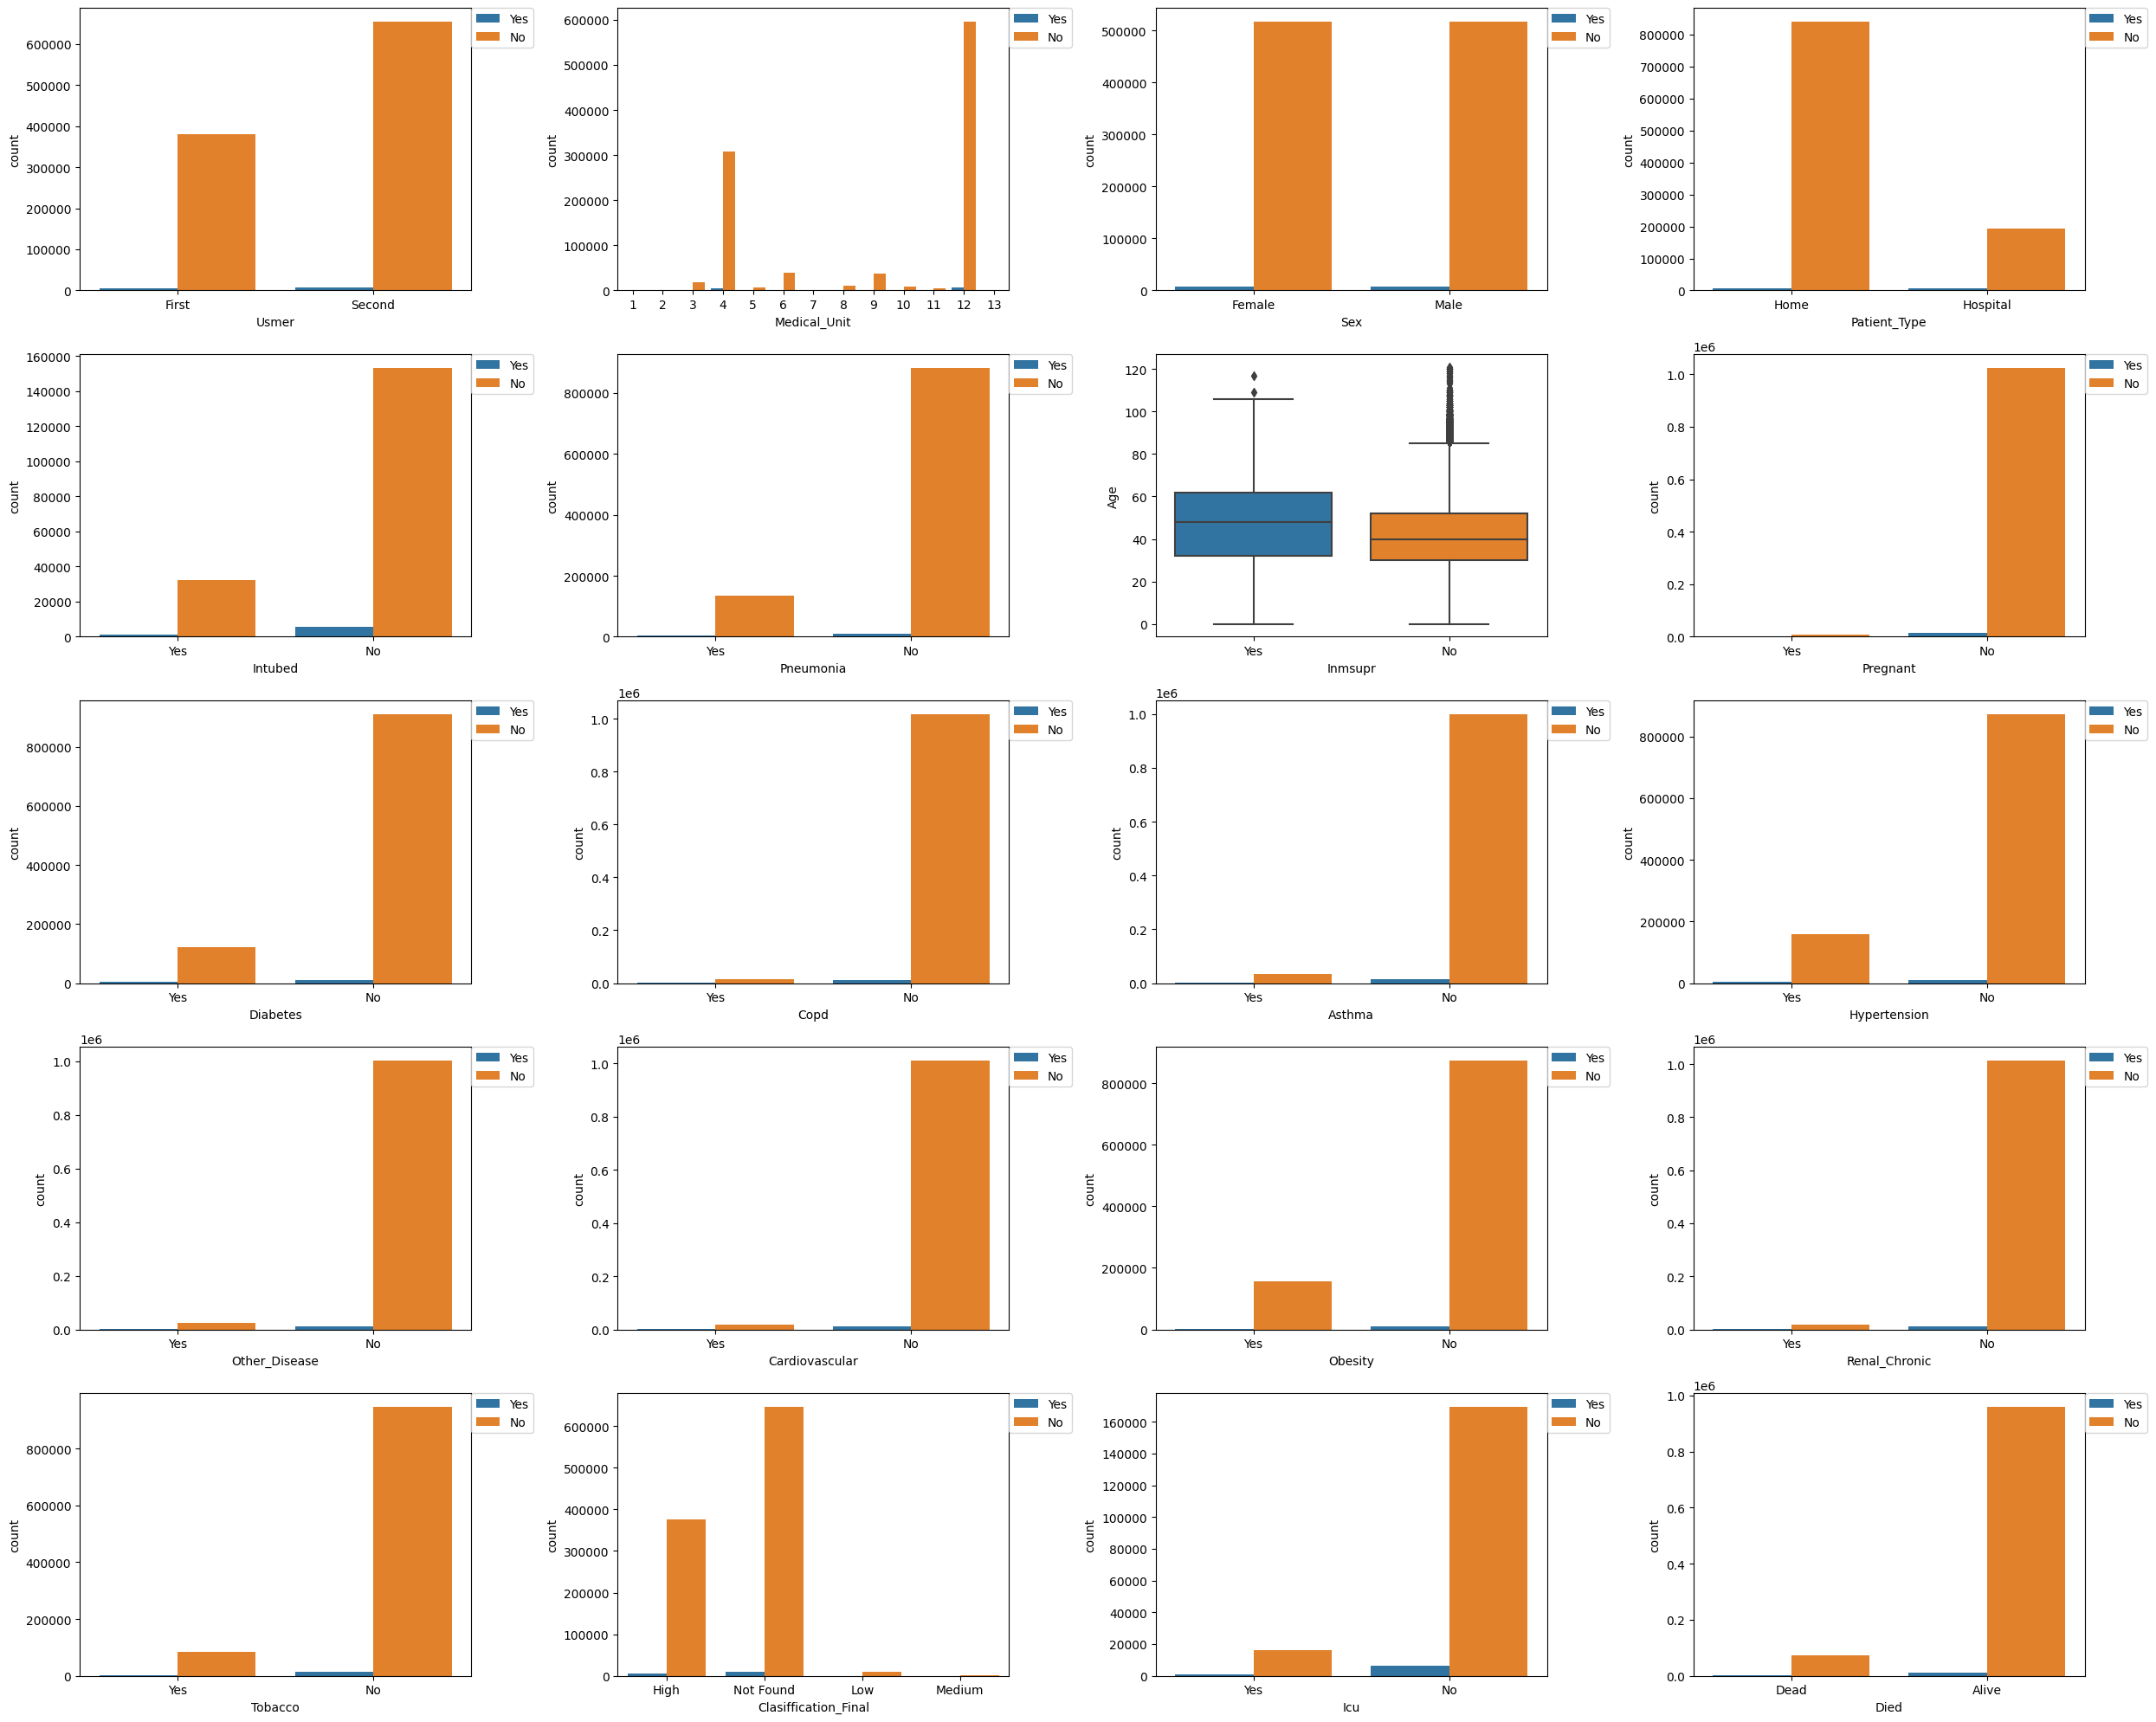

In [54]:
bivariate(y = 'Inmsupr')

In [51]:
# Medical Unit gives a slight pattern with Inmsupr: 
# Only Units 4, 12 detect patients as immunosuppressed, others don't

data.loc[(data['Inmsupr'].isnull()) & (data['Medical_Unit'] == 4) &(data['Medical_Unit'] == 12), 'Inmsupr'] = 'Yes'
data.loc[data['Inmsupr'].isnull(), 'Inmsupr'] = 'No'

In [52]:
data.isnull().sum() [ data.isnull().sum() > 0]

Intubed           855869
Pneumonia          16003
Hypertension        3104
Other_Disease       5045
Cardiovascular      3076
Obesity             3032
Renal_Chronic       3006
Tobacco             3220
Icu               856032
dtype: int64

### Column: Pneumonia